In [43]:
using OpenStreetMapX
using Downloads
using GZip
using PyCall
using DataFrames
using Statistics
using Plots
include("analyse.jl")
include("prepare_data.jl")

get_POI (generic function with 3 methods)

Download cities

In [105]:
download_data("Cracow")
download_data("Brno")
download_data("Gliwice")

"The file is already downloaded"

In [108]:
mp = get_map_data("Cracow.osm")

┌ Info: Saved map data to cache Cracow.osm.cache
└ @ OpenStreetMapX C:\Users\adama\.julia\packages\OpenStreetMapX\bHzij\src\parseMap.jl:106


MapData(OpenStreetMapX.Bounds{LLA}(49.96, 50.14, 19.76, 20.16), Dict{Int64, ENU}(935185627 => ENU(3863.268621854703, 1640.6491075966596, -1.3788774398690293), 1383545656 => ENU(10951.412347465612, 3857.2114441000413, -10.550664641419417), 2059978584 => ENU(9049.506604400145, -7375.499312101218, -10.675115446143991), 9228243746 => ENU(2472.438978939706, -909.8239889334834, -0.5432124608089453), 2331041470 => ENU(6785.511267426188, -3064.7865712875605, -4.3392828839614594), 10624460328 => ENU(44.84106049996467, -2437.667916590734, -0.4663602207533586), 10589181493 => ENU(7837.68146090907, -5653.604037744402, -7.313857416746487), 7928649185 => ENU(-2060.075845118815, -786.1551826295656, -0.3805261088763814), 3047911614 => ENU(2463.998869171668, 5062.398651486936, -2.485659339588892), 8596308790 => ENU(4749.4157805164095, 2845.86566134413, -2.4002276039764183)…), OpenStreetMapX.Way[OpenStreetMapX.Way(2954554, [13822576, 1234198750, 1234198734, 13822694, 1234198742, 8306202089, 9905611919, 

In [110]:
OpenStreetMapX.center(mp.bounds)


LLA(50.05, 19.96, 0.0)

In [82]:
a = "123"
string(a,".asd")

"123.asd"

In [4]:
df_cracow = get_POI("Cracow.osm",nothing,"Cracow.csv")
df_brno = get_POI("Brno.osm",nothing,"Brno.csv")
df_gliwice = get_POI("Gliwice.osm",nothing,"Gliwice.csv")

,elemtype,elemid,nodeid,lat,lon,key,value
,Symbol,Int64,Int64,Float64,Float64,String,String
1,node,28898012,28898012,50.2874,18.6641,public_transport,stop_position
2,node,29017182,29017182,50.2881,18.6603,public_transport,stop_position
3,node,29092672,29092672,50.2783,18.6579,public_transport,stop_position
4,node,192727330,192727330,50.191,18.8703,public_transport,stop_position
5,node,197994750,197994750,50.1825,18.6511,public_transport,stop_position
6,node,198120498,198120498,50.2876,18.654,public_transport,stop_position
7,node,198121009,198121009,50.2879,18.6545,public_transport,stop_position
8,node,198122611,198122611,50.2969,18.6588,public_transport,stop_position
9,node,198122619,198122619,50.2964,18.6571,public_transport,stop_position


In [5]:
center_cracow = LLA(50.061692315544654, 19.939496620660737)
center_brno = LLA(49.196664523003115, 16.60804112914713)
center_gliwice = LLA(50.29388096424714, 18.66566269980933)
ix_cracow = AttractivenessSpatIndex(df_cracow,get_range=a->500)
ix_brno = AttractivenessSpatIndex(df_brno,get_range=a->500)
ix_gliwice = AttractivenessSpatIndex(df_gliwice,get_range=a->500)

AttractivenessSpatIndex{AttractivenessMetaPOI, typeof(get_attractiveness_group)}(SpatialIndexing.RTree{Float64, 2, SpatialIndexing.SpatialElem{Float64, 2, Int64, OSMToolset.AttractivenessData{AttractivenessMetaPOI}}}(variant=RTreeStar, tight_mbrs=true, nearmin_overlap=32, fill_factor=0.7, split_factor=0.4, reinsert_factor=0.3, leaf_capacity=100, branch_capacity=100)
15385 element(s) in 3 level(s) (1, 2, 200 node(s) per level):
 level=3 nchildren=2 mbr=((-14572.874403161311, -14399.46972170737), (9944.871016940759, 13299.92167291433)), 15385×10 DataFrame
   Row │ elemtype  elemid     nodeid       lat      lon      key               ⋯
       │ Symbol    Int64      Int64        Float64  Float64  String            ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ node       28898012     28898012  50.2874  18.6641  public_transport  ⋯
     2 │ node       29017182     29017182  50.2881  18.6603  public_transport
     3 │ node       29092672     29092

In [6]:
points_cracow = generate_sectors(200,50,center_cracow,360)
points_brno = generate_sectors(200,50,center_brno,360)
points_gliwice = generate_sectors(200,50,center_gliwice,360)

200×360 Matrix{LLA}:
 LLA(50.2939, 18.6664, 0.000195594)  …  LLA(50.2939, 18.6664, 0.000195595)
 LLA(50.2939, 18.6671, 0.000782374)     LLA(50.2939, 18.6671, 0.000782373)
 LLA(50.2939, 18.6678, 0.00176034)      LLA(50.2939, 18.6678, 0.00176034)
 LLA(50.2939, 18.6685, 0.0031295)       LLA(50.2939, 18.6685, 0.00312949)
 LLA(50.2939, 18.6692, 0.00488984)      LLA(50.2939, 18.6692, 0.00488983)
 LLA(50.2939, 18.6699, 0.00704137)   …  LLA(50.2939, 18.6699, 0.00704136)
 LLA(50.2939, 18.6706, 0.00958408)      LLA(50.2939, 18.6706, 0.00958407)
 LLA(50.2939, 18.6713, 0.012518)        LLA(50.2939, 18.6713, 0.012518)
 LLA(50.294, 18.672, 0.0158431)         LLA(50.2939, 18.672, 0.0158431)
 LLA(50.294, 18.6727, 0.0195594)        LLA(50.2939, 18.6727, 0.0195593)
 ⋮                                   ⋱  
 LLA(50.2953, 18.8004, 7.21035)         LLA(50.2938, 18.8004, 7.21035)
 LLA(50.2953, 18.8011, 7.28566)         LLA(50.2938, 18.8011, 7.28565)
 LLA(50.2953, 18.8018, 7.36135)         LLA(50.2938, 18.801

In [7]:
attr = :shopping
attr_cracow = calculate_attractiveness_of_sector(points_cracow,ix_cracow,attr)
attr_brno = calculate_attractiveness_of_sector(points_brno,ix_brno,attr)
attr_gliwice = calculate_attractiveness_of_sector(points_gliwice,ix_gliwice,attr)

200-element Vector{Float64}:
 621.605810687834
 602.7539892411182
 568.8661481652342
 523.8184966225917
 472.91818672249985
 418.81582603167345
 363.0604973169608
 309.6603326603734
 262.2551896944647
 222.5778393626406
   ⋮
   1.319060922187328
   1.269071748235239
   1.1953661976779
   1.1126127032442632
   0.9930184381765995
   0.8877541208838218
   0.7721625103331167
   0.6745857978009572
   0.5850248257824163

In [8]:
stand_cracow = min_max_scaling(attr_cracow)
stand_brno = min_max_scaling(attr_brno)
stand_gliwice = min_max_scaling(attr_gliwice)

200-element Vector{Float64}:
 1.0
 0.9696438156726958
 0.9150758497569598
 0.8425377760431936
 0.7605754471503915
 0.6734570093742295
 0.5836768764317909
 0.4976891512665832
 0.4213549221310727
 0.3574643870071199
 ⋮
 0.0011819831366610075
 0.0011014879663058027
 0.0009828034516562217
 0.0008495494667372387
 0.0006569725549972356
 0.00048747047118749933
 0.000301338842130591
 0.00014421573972635946
 0.0

In [65]:
x_axis = [i*50 for i in 1:200]./1000

200-element Vector{Float64}:
  0.05
  0.1
  0.15
  0.2
  0.25
  0.3
  0.35
  0.4
  0.45
  0.5
  ⋮
  9.6
  9.65
  9.7
  9.75
  9.8
  9.85
  9.9
  9.95
 10.0

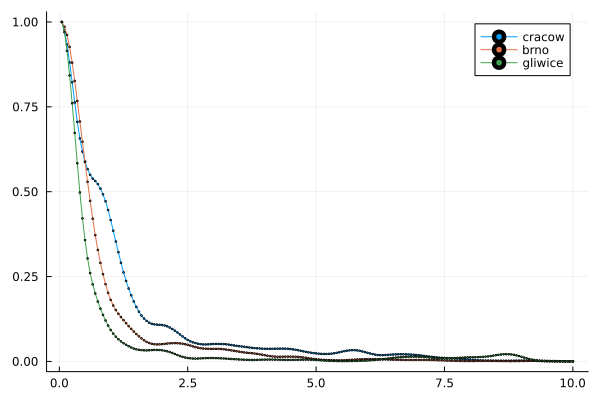

In [118]:
plotconfig = (marker=:circle, markersize=1)
cities = [stand_cracow, stand_brno,stand_gliwice]
labels = ["cracow" "brno" "gliwice"]
plot(x_axis,cities, labels = labels; plotconfig...)
#plot!(x_axis,stand_brno, label = "Brno"; plotconfig...)
#plot!(x_axis,stand_gliwice, label = "Gliwice"; plotconfig...)

In [160]:
cities_workflow = workflow(["cracow","brno","gliwice"],200,50,360,1000,true)

┌ Info: Read map data from cache cracow.osm.cache
└ @ OpenStreetMapX C:\Users\adama\.julia\packages\OpenStreetMapX\bHzij\src\parseMap.jl:93


┌ Info: Read map data from cache brno.osm.cache
└ @ OpenStreetMapX C:\Users\adama\.julia\packages\OpenStreetMapX\bHzij\src\parseMap.jl:93


┌ Info: Read map data from cache gliwice.osm.cache
└ @ OpenStreetMapX C:\Users\adama\.julia\packages\OpenStreetMapX\bHzij\src\parseMap.jl:93


3-element Vector{Any}:
 [0.5042319810907191, 0.49701866400973654, 0.49789746602316665, 0.5098176879546806, 0.5323649597134047, 0.5606601401555737, 0.5910745108077113, 0.6240483222984666, 0.6600229162376753, 0.6972181933120996  …  0.0009411655142576069, 0.00033386893658272963, 3.0710867838856e-5, 0.0, 0.0002001364431339345, 0.0006470032484867499, 0.0012553614996007234, 0.002089455572327023, 0.003209567725665273, 0.004440334005795386]
 [1.0, 0.9755126613536855, 0.9387804722130518, 0.9005856050587844, 0.8609586316733129, 0.8166998747417722, 0.7656913549828593, 0.7072562623366674, 0.6480102519228782, 0.5947229350148576  …  0.001430093244166256, 0.0012324113870813486, 0.0009851176612766343, 0.0007108936026357009, 0.0004505660220460898, 0.00023187200647419314, 5.815813471518335e-5, 0.0, 0.000131444928590501, 0.0005697159220142686]
 [0.42416810454697856, 0.4090893653658692, 0.3863117699032143, 0.3545005264845732, 0.31901737294430826, 0.285638938047615, 0.25222471115324063, 0.2256082074185277,

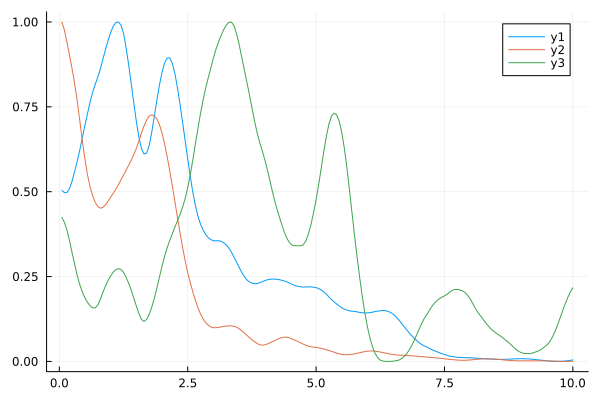

In [161]:
plot(x_axis,cities_workflow)